In [92]:
import h5py
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math

import seaborn as sns
import pandas as pd
from itertools import islice

import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem

In [93]:
#importing data
spectraldata = "/Users/malina/python_codes/spectral_templates_data_version_june20.h5"

pd.read_hdf(spectraldata, key = "binaries")

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [94]:
#defining locations

python_codes = '/Users/malina/python_codes/'
spectraldata = "spectral_templates_data_version_june20.h5"
singles = pd.read_hdf(python_codes + spectraldata , key='singles')
binaries = pd.read_hdf(python_codes + spectraldata, key = 'binaries')
wavelengths = pd.read_hdf(python_codes + spectraldata , key= 'wavegrid')

In [95]:
print(singles)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1    0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2    0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4    0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.004027 -0.007743 -0.004455  0.005451  0.001937 -0.002612  0.002762   
432  0.008489  0.009103 -0.001436  0.010861  0.008182  0.012516  0.011853   
433 -0.004778  0.078588  0.011728 -0.005535  0.033752  0.007601 -0.034531   
434  0.073008  0.009225 -0.005804 -0.039170 -0.014236 -0.015112  0.038132   
435  0.001837 -0.014860 -0.004494  0.012385 -0.003599 -0.001110  0.012853   

       flux_7    flux_8    flux_9  ...  flux_433  flux_434  flux_435  \
0  

In [96]:
#draw any number of binaries from data

def draw_random_binaries_stars(n=436):
    binaries = pd.read_hdf(python_codes+spectraldata, key='binaries')
    binaries = binaries.sample(n)
    return binaries

In [97]:
df_binaries= draw_random_binaries_stars(n=436)

In [98]:
print(df_binaries)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
67080   0.110112  0.128652  0.107866  0.084783  0.105692  0.139811  0.147226   
50256   0.121325  0.115593  0.117433  0.152065  0.161765  0.166102  0.163754   
89704   0.006529  0.005589  0.005121  0.008260  0.009083  0.009592  0.008288   
88471   0.105512  0.039152  0.074301  0.079826  0.105588  0.098225  0.112311   
19935   0.165518  0.197332  0.217144  0.249909  0.282775  0.310302  0.316271   
...          ...       ...       ...       ...       ...       ...       ...   
53056   0.081413  0.083504  0.091007  0.114323  0.114639  0.113971  0.146109   
105436 -0.006913 -0.023370 -0.028274 -0.031008 -0.006565  0.018277  0.013079   
58568   0.182806  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
29825   0.145447  0.158046  0.199421  0.251084  0.275143  0.305361  0.301153   
77250   0.075905  0.086518  0.105170  0.100294  0.121171  0.110624  0.113755   

          flux_7    flux_8    flux_9  .

In [99]:
df_singles = singles

<AxesSubplot:ylabel='Frequency'>

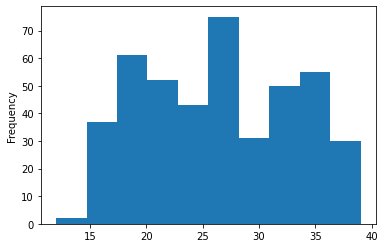

In [100]:
# visualizing data

df_singles.spectral_type.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

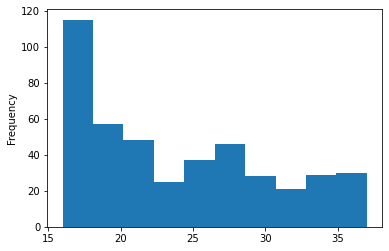

In [101]:
df_binaries.system_type.plot(kind = 'hist')

In [102]:
# change column names

df_newbinaries = df_binaries.rename(columns = {'system_type':'spectral_type'})
print(df_newbinaries)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
67080   0.110112  0.128652  0.107866  0.084783  0.105692  0.139811  0.147226   
50256   0.121325  0.115593  0.117433  0.152065  0.161765  0.166102  0.163754   
89704   0.006529  0.005589  0.005121  0.008260  0.009083  0.009592  0.008288   
88471   0.105512  0.039152  0.074301  0.079826  0.105588  0.098225  0.112311   
19935   0.165518  0.197332  0.217144  0.249909  0.282775  0.310302  0.316271   
...          ...       ...       ...       ...       ...       ...       ...   
53056   0.081413  0.083504  0.091007  0.114323  0.114639  0.113971  0.146109   
105436 -0.006913 -0.023370 -0.028274 -0.031008 -0.006565  0.018277  0.013079   
58568   0.182806  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
29825   0.145447  0.158046  0.199421  0.251084  0.275143  0.305361  0.301153   
77250   0.075905  0.086518  0.105170  0.100294  0.121171  0.110624  0.113755   

          flux_7    flux_8    flux_9  .

In [103]:
len(df_newbinaries)

436

In [104]:
#checking for NANS

df_newbinaries.isnull().values.any()

False

In [105]:
df_binaryflux = df_newbinaries.drop('primary_type', axis = 1).drop('spectral_type', axis = 1).drop('secondary_type', axis = 1)
print(df_binaryflux)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
67080   0.110112  0.128652  0.107866  0.084783  0.105692  0.139811  0.147226   
50256   0.121325  0.115593  0.117433  0.152065  0.161765  0.166102  0.163754   
89704   0.006529  0.005589  0.005121  0.008260  0.009083  0.009592  0.008288   
88471   0.105512  0.039152  0.074301  0.079826  0.105588  0.098225  0.112311   
19935   0.165518  0.197332  0.217144  0.249909  0.282775  0.310302  0.316271   
...          ...       ...       ...       ...       ...       ...       ...   
53056   0.081413  0.083504  0.091007  0.114323  0.114639  0.113971  0.146109   
105436 -0.006913 -0.023370 -0.028274 -0.031008 -0.006565  0.018277  0.013079   
58568   0.182806  0.200000  0.200000  0.200000  0.200000  0.200000  0.200000   
29825   0.145447  0.158046  0.199421  0.251084  0.275143  0.305361  0.301153   
77250   0.075905  0.086518  0.105170  0.100294  0.121171  0.110624  0.113755   

          flux_7    flux_8    flux_9  .

In [106]:
# adding noise to binaries

n1, n2 = 0, 0.05
binarynoise = np.random.normal(n1, n2, [len(df_newbinaries), 441]) 
print(binarynoise)

[[ 0.10972795  0.03515314  0.03232595 ... -0.05161908 -0.04868494
  -0.02267383]
 [ 0.00080912 -0.03410462  0.04718133 ...  0.06088813 -0.04272272
   0.0066898 ]
 [-0.02651093 -0.04458552 -0.03151271 ... -0.04220014  0.05257421
  -0.05545068]
 ...
 [-0.08695165  0.02735663  0.05292368 ... -0.05038744 -0.02711475
   0.05990274]
 [-0.01572593 -0.02202692 -0.06615736 ... -0.05426278  0.03520076
  -0.05307631]
 [ 0.00483242 -0.01640248 -0.10014368 ...  0.01229661  0.01136409
  -0.05252982]]


In [107]:
noisybinaryflux = df_binaryflux + binarynoise
print(noisybinaryflux)

          flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
67080   0.219840  0.163805  0.140192  0.103755  0.091652  0.112726  0.107007   
50256   0.122134  0.081488  0.164614  0.174103  0.223723  0.246283  0.270328   
89704  -0.019982 -0.038996 -0.026392 -0.015340 -0.000226 -0.002281  0.021326   
88471   0.073503  0.040483  0.203139  0.061170  0.173989  0.057979  0.139468   
19935   0.120169  0.228277  0.258541  0.161262  0.359063  0.459085  0.262489   
...          ...       ...       ...       ...       ...       ...       ...   
53056   0.098425  0.107257  0.155739  0.125730  0.099241  0.074102  0.197995   
105436  0.024344 -0.032934 -0.003647 -0.085414 -0.046520  0.034438 -0.045514   
58568   0.095854  0.227357  0.252924  0.262147  0.169836  0.161651  0.186773   
29825   0.129721  0.136019  0.133264  0.276705  0.269352  0.273780  0.330247   
77250   0.080737  0.070115  0.005026  0.163306  0.164446  0.071536  0.135837   

          flux_7    flux_8    flux_9  .

In [108]:
# adding noise to singles

df_singlesflux = df_singles.drop('object_name', axis = 1).drop('spectral_type', axis = 1)
print(df_singlesflux)

n1, n2 = 0, 0.05
singlesnoise = np.random.normal(n1, n2, [len(df_singlesflux), 441]) 
print(singlesnoise)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.494552  0.566051  0.614045  0.661532  0.686862  0.693291  0.702654   
1    0.634512  0.657556  0.714886  0.740784  0.703573  0.701638  0.724311   
2    0.493893  0.550069  0.571380  0.647315  0.666165  0.634119  0.608750   
3    0.527926  0.576912  0.620860  0.613389  0.629185  0.647721  0.653567   
4    0.462815  0.535964  0.581080  0.607863  0.694902  0.748792  0.615324   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.004027 -0.007743 -0.004455  0.005451  0.001937 -0.002612  0.002762   
432  0.008489  0.009103 -0.001436  0.010861  0.008182  0.012516  0.011853   
433 -0.004778  0.078588  0.011728 -0.005535  0.033752  0.007601 -0.034531   
434  0.073008  0.009225 -0.005804 -0.039170 -0.014236 -0.015112  0.038132   
435  0.001837 -0.014860 -0.004494  0.012385 -0.003599 -0.001110  0.012853   

       flux_7    flux_8    flux_9  ...  flux_431  flux_432  flux_433  \
0  

In [109]:
noisysinglesflux = df_singlesflux + singlesnoise
print(noisysinglesflux)

       flux_0    flux_1    flux_2    flux_3    flux_4    flux_5    flux_6  \
0    0.495165  0.517789  0.697635  0.686387  0.775701  0.699270  0.722452   
1    0.689745  0.640220  0.712868  0.771994  0.721106  0.723566  0.602613   
2    0.527304  0.549834  0.535990  0.672957  0.630987  0.559517  0.626362   
3    0.557701  0.582779  0.544416  0.660129  0.616345  0.641622  0.707021   
4    0.461492  0.522968  0.600726  0.612953  0.722512  0.725246  0.621049   
..        ...       ...       ...       ...       ...       ...       ...   
431 -0.038969 -0.013956 -0.009619 -0.075096 -0.063013  0.015454 -0.061315   
432 -0.109603 -0.014912  0.068706 -0.064268 -0.000815  0.024316  0.078367   
433 -0.009728  0.080715  0.011511 -0.019820 -0.001753 -0.017174 -0.057815   
434  0.071511  0.123748  0.020156 -0.002096  0.050068  0.032821  0.060363   
435 -0.002848 -0.050342  0.064169 -0.028522 -0.087062 -0.054227 -0.084800   

       flux_7    flux_8    flux_9  ...  flux_431  flux_432  flux_433  \
0  

In [110]:
# numerical classification

df_singles["binary"] = 0
df_newbinaries["binary"] = 1

In [117]:
df_noisynewbinaries = pd.concat([df_newbinaries["spectral_type"], noisybinaryflux, df_newbinaries["binary"]], axis=1)
print(df_noisynewbinaries)

        spectral_type    flux_0    flux_1    flux_2    flux_3    flux_4  \
67080            23.0  0.219840  0.163805  0.140192  0.103755  0.091652   
50256            22.0  0.122134  0.081488  0.164614  0.174103  0.223723   
89704            29.0 -0.019982 -0.038996 -0.026392 -0.015340 -0.000226   
88471            28.0  0.073503  0.040483  0.203139  0.061170  0.173989   
19935            20.0  0.120169  0.228277  0.258541  0.161262  0.359063   
...               ...       ...       ...       ...       ...       ...   
53056            26.0  0.098425  0.107257  0.155739  0.125730  0.099241   
105436           35.0  0.024344 -0.032934 -0.003647 -0.085414 -0.046520   
58568            27.0  0.095854  0.227357  0.252924  0.262147  0.169836   
29825            19.0  0.129721  0.136019  0.133264  0.276705  0.269352   
77250            26.0  0.080737  0.070115  0.005026  0.163306  0.164446   

          flux_5    flux_6    flux_7    flux_8  ...  flux_432  flux_433  \
67080   0.112726  0.1070

In [118]:
df_noisysingles = pd.concat([df_singles["spectral_type"], noisysinglesflux, df_singles["binary"]], axis=1)
print(df_noisysingles)

     spectral_type    flux_0    flux_1    flux_2    flux_3    flux_4  \
0             16.0  0.495165  0.517789  0.697635  0.686387  0.775701   
1             12.0  0.689745  0.640220  0.712868  0.771994  0.721106   
2             15.0  0.527304  0.549834  0.535990  0.672957  0.630987   
3             17.0  0.557701  0.582779  0.544416  0.660129  0.616345   
4             13.0  0.461492  0.522968  0.600726  0.612953  0.722512   
..             ...       ...       ...       ...       ...       ...   
431           38.0 -0.038969 -0.013956 -0.009619 -0.075096 -0.063013   
432           38.0 -0.109603 -0.014912  0.068706 -0.064268 -0.000815   
433           37.0 -0.009728  0.080715  0.011511 -0.019820 -0.001753   
434           38.0  0.071511  0.123748  0.020156 -0.002096  0.050068   
435           39.0 -0.002848 -0.050342  0.064169 -0.028522 -0.087062   

       flux_5    flux_6    flux_7    flux_8  ...  flux_432  flux_433  \
0    0.699270  0.722452  0.616245  0.659421  ...  0.170174  0.1

In [119]:
frames = [df_noisysingles, df_noisynewbinaries]
result = pd.concat(frames)
print(result)

        spectral_type    flux_0    flux_1    flux_2    flux_3    flux_4  \
0                16.0  0.495165  0.517789  0.697635  0.686387  0.775701   
1                12.0  0.689745  0.640220  0.712868  0.771994  0.721106   
2                15.0  0.527304  0.549834  0.535990  0.672957  0.630987   
3                17.0  0.557701  0.582779  0.544416  0.660129  0.616345   
4                13.0  0.461492  0.522968  0.600726  0.612953  0.722512   
...               ...       ...       ...       ...       ...       ...   
53056            26.0  0.098425  0.107257  0.155739  0.125730  0.099241   
105436           35.0  0.024344 -0.032934 -0.003647 -0.085414 -0.046520   
58568            27.0  0.095854  0.227357  0.252924  0.262147  0.169836   
29825            19.0  0.129721  0.136019  0.133264  0.276705  0.269352   
77250            26.0  0.080737  0.070115  0.005026  0.163306  0.164446   

          flux_5    flux_6    flux_7    flux_8  ...  flux_432  flux_433  \
0       0.699270  0.7224

In [120]:
from sklearn.model_selection import train_test_split
RSEED = 42  

shuffled = result.sample(frac=1)
print(shuffled)

feats = list(shuffled.columns)

x0 = np.array(shuffled[feats])
y0 = np.array(shuffled['binary'])

        spectral_type    flux_0    flux_1    flux_2    flux_3    flux_4  \
354              34.0  0.007338 -0.013551 -0.017122 -0.056572 -0.015975   
90               20.0  0.096580  0.199755  0.170576  0.131358  0.197057   
82185            27.0  0.304253  0.007781 -0.059294  0.053534  0.071114   
241              28.0  0.005243  0.127830 -0.019339  0.086738  0.056103   
193              24.0  0.179342  0.063940  0.128259  0.095928  0.122712   
...               ...       ...       ...       ...       ...       ...   
30673            20.0  0.244120  0.219039  0.188425  0.279527  0.232396   
78317            26.0  0.153668  0.087486  0.094146  0.140092  0.103489   
101904           33.0  0.008038 -0.026401  0.042738  0.054852  0.061887   
101058           33.0 -0.524678 -0.531874 -0.465446 -0.387949 -0.436287   
566              16.0  0.641900  0.641153  0.684287  0.643817  0.751672   

          flux_5    flux_6    flux_7    flux_8  ...  flux_432  flux_433  \
354    -0.090666 -0.0858

In [121]:
print(y0)

[0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1
 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 1 0 0 1 1 1 1 0 

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x0,y0,train_size=0.75, random_state=RSEED, shuffle=True)

In [123]:
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [124]:
from sklearn.metrics import precision_score

test_preds = RF.predict(x_test)

print("The raw features produce a model with precision ~{:.4f} !".format(precision_score(y_test, test_preds)))

The raw features produce a model with precision ~0.8548 !


In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       106
           1       0.85      0.95      0.90       112

    accuracy                           0.89       218
   macro avg       0.90      0.89      0.89       218
weighted avg       0.89      0.89      0.89       218



In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_preds)

array([[ 88,  18],
       [  6, 106]])